In [1]:
import pandas as pd
import numpy as np
import pprint
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [2]:
# Load the cleaned streaming_titles_info dataset (change the path if necessary)
file_path = r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\final_df.csv"
streaming_titles_info = pd.read_csv(file_path)


In [6]:
# Rename columns in the dataframe
streaming_titles_info = streaming_titles_info.rename(columns={
    'imdbNumVotes': 'numVotes',
    'imdbAverageRating': 'rating'
})

# Verify the changes
streaming_titles_info.head()


,imdbId,title,releaseYear,genres,type,rating,numVotes,Amazon,Hulu,Netflix,...,Reality-TV,Romance,Science Fiction,Short,Sport,Talk-Show,Thriller,War,Western,niche
0,tt0000417,A Trip to the Moon,1902,"['Adventure', 'Comedy', 'Fantasy']",movie,8.1,57365,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0000499,An Impossible Voyage,1904,"['Action', 'Adventure', 'Family']",movie,7.5,4153,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0002646,Atlantis,1913,['Drama'],movie,6.5,502,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0003014,Ingeborg Holm,1913,['Drama'],movie,7.0,1479,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,tt0004181,Judith of Bethulia,1914,['Drama'],movie,6.2,1482,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
streaming_titles_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89156 entries, 0 to 89155
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   imdbId           89156 non-null  object 
 1   title            89156 non-null  object 
 2   releaseYear      89156 non-null  int64  
 3   genres           89156 non-null  object 
 4   type             89156 non-null  object 
 5   rating           89156 non-null  float64
 6   numVotes         89156 non-null  int64  
 7   Amazon           89156 non-null  int64  
 8   Hulu             89156 non-null  int64  
 9   Netflix          89156 non-null  int64  
 10  HBO              89156 non-null  int64  
 11  Apple            89156 non-null  int64  
 12  Action           89156 non-null  int64  
 13  Adventure        89156 non-null  int64  
 14  Animation        89156 non-null  int64  
 15  Comedy           89156 non-null  int64  
 16  Crime            89156 non-null  int64  
 17  Documentary 

# Final Check

**Check for Missing Values**

In [14]:
print("Checking for missing values...")
missing_values = streaming_titles_info.isnull().sum()
print(missing_values[missing_values > 0])

Checking for missing values...
Series([], dtype: int64)


**Data Type Consistency**

In [16]:
print("\nChecking data types...")
data_types = streaming_titles_info.dtypes
print(data_types)


Checking data types...
imdbId              object
title               object
releaseYear          int64
genres              object
type                object
rating             float64
numVotes             int64
Amazon               int64
Hulu                 int64
Netflix              int64
HBO                  int64
Apple                int64
Action               int64
Adventure            int64
Animation            int64
Comedy               int64
Crime                int64
Documentary          int64
Drama                int64
Family               int64
Fantasy              int64
History              int64
Horror               int64
Music                int64
Mystery              int64
Reality-TV           int64
Romance              int64
Science Fiction      int64
Short                int64
Sport                int64
Talk-Show            int64
Thriller             int64
War                  int64
Western              int64
niche                int64
dtype: object


**Duplicate Handling**

In [19]:
print("\nChecking for duplicate rows...")
duplicates = streaming_titles_info.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Checking for duplicate rows...
Number of duplicate rows: 0


**Final Check for Consistency**

In [20]:
print("\nFinal Check:")
# Checking if any genres columns are zero (should not be, except for missing genres)
zeros_in_genres = streaming_titles_info.drop(columns=['imdbId', 'title', 'releaseYear', 'genres', 'type', 'rating', 'numVotes']).sum(axis=0)
print("\nColumns with zero sum in encoded genres (should be zero):")
print(zeros_in_genres[zeros_in_genres == 0])


Final Check:

Columns with zero sum in encoded genres (should be zero):
Series([], dtype: int64)


**Final dataframe after cleaning**

In [21]:
print("\nFinal DataFrame shape:", streaming_titles_info.shape)


Final DataFrame shape: (89156, 35)


In [23]:
# Assuming final_df is already defined

# Calculate Z-scores for 'numVotes' and 'rating' columns
streaming_titles_info['numVotes_zscore'] = zscore(streaming_titles_info['numVotes'])
streaming_titles_info['rating_zscore'] = zscore(streaming_titles_info['rating'])

# Define outlier threshold (e.g., z-score > 3 or < -3)
outlier_threshold = 3

# Filter out rows where z-score for either column is greater than the threshold
numVotes_outliers = streaming_titles_info[np.abs(streaming_titles_info['numVotes_zscore']) > outlier_threshold]
rating_outliers = streaming_titles_info[np.abs(streaming_titles_info['rating_zscore']) > outlier_threshold]

# Print the number of outliers detected
print(f"Number of outliers in numVotes: {len(numVotes_outliers)}")
print(f"Number of outliers in rating: {len(rating_outliers)}")

Number of outliers in numVotes: 1114
Number of outliers in rating: 293


In [24]:
# Calculate 1st and 99th percentiles
lower_percentile = streaming_titles_info['numVotes'].quantile(0.01)
upper_percentile = streaming_titles_info['numVotes'].quantile(0.99)

# Cap values outside of these percentiles
streaming_titles_info['numVotes'] = streaming_titles_info['numVotes'].clip(lower=lower_percentile, upper=upper_percentile)

lower_percentile_rating = streaming_titles_info['rating'].quantile(0.01)
upper_percentile_rating = streaming_titles_info['rating'].quantile(0.99)

streaming_titles_info['rating'] = streaming_titles_info['rating'].clip(lower=lower_percentile_rating, upper=upper_percentile_rating)


## Distribution of Ratings and Number of Votes

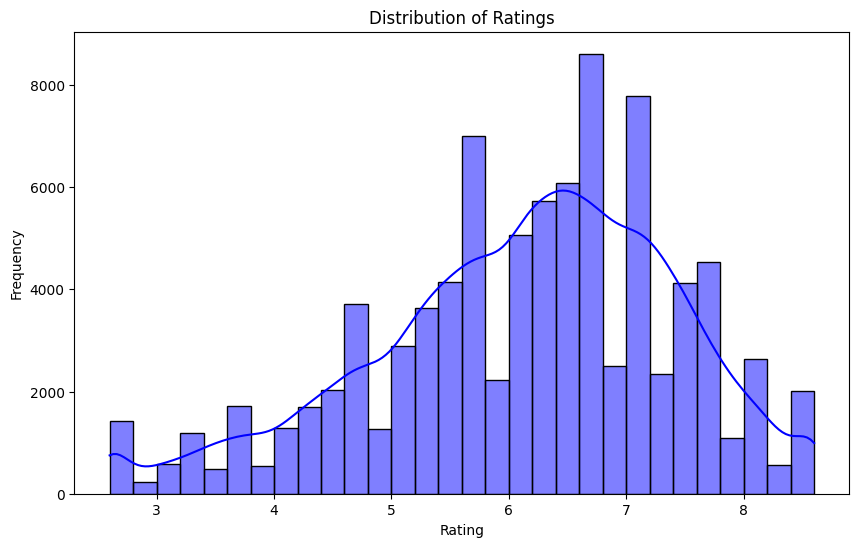

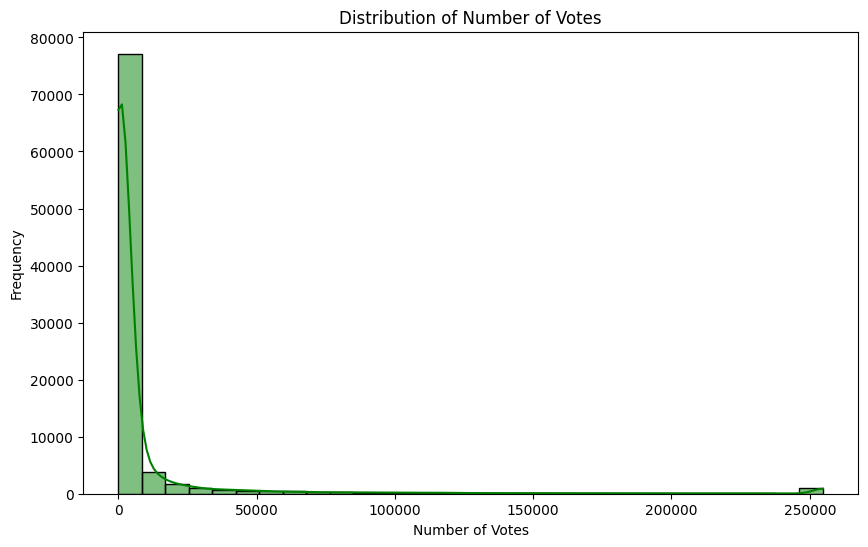

In [26]:
# Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(streaming_titles_info['rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Number of Votes Distribution
plt.figure(figsize=(10, 6))
sns.histplot(streaming_titles_info['numVotes'], bins=30, kde=True, color='green')
plt.title('Distribution of Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()


In [27]:
# Save the cleaned DataFrame to the specified location
file_path = r"C:\Users\kimbe\Documents\StreamingAnalysis\data\cleaned_data\streaming_titles_info.csv"

# Save the DataFrame as a CSV file
streaming_titles_info.to_csv(file_path, index=False)

file_path

'C:\\Users\\kimbe\\Documents\\StreamingAnalysis\\data\\cleaned_data\\streaming_titles_info.csv'